In [1]:
import pandas as pd
import numpy as np
import random
import matplotlib.pyplot as plt
import seaborn as sns
import seaborn.objects as so

In [2]:
random.seed(1)

In [3]:
%run '../modules/mongodb.py'

In [4]:
mongodb = MongoDB()
mongoufc = mongodb.client()['ufc']
cur = mongoufc.processing.find({})
original = pd.DataFrame(cur)
original.drop(columns=['_id'], inplace=True)
original.head()

,r_odds,b_odds,r_ev,b_ev,winner,title_bout,weight_class,gender,no_of_rounds,b_current_lose_streak,...,r_height_cms,r_reach_cms,r_weight_lbs,r_age,b_age,empty_arena,b_match_weightclass_rank,r_match_weightclass_rank,b_pound_for_pound_rank,better_rank
0,-150,130,66.667,130,0,False,Light Heavyweight,MALE,5,0,...,187.96,193.04,205,37,29,1,10,5,<NA>,Red
1,170,-200,170.0,50,1,False,Welterweight,MALE,3,2,...,180.34,193.04,170,33,32,1,<NA>,<NA>,<NA>,neither
2,110,-130,110.0,76,1,False,Middleweight,MALE,3,1,...,190.5,195.58,205,34,32,1,<NA>,<NA>,<NA>,neither
3,-675,475,14.815,475,0,False,Lightweight,MALE,3,1,...,175.26,182.88,155,29,32,1,<NA>,<NA>,<NA>,neither
4,-135,115,74.074,115,1,False,Lightweight,MALE,3,0,...,175.26,177.8,155,28,33,1,<NA>,<NA>,<NA>,neither


In [5]:
cur = mongoufc.backend.find({})
backend = pd.DataFrame(cur)

cur = mongoufc.processing.find({})
original = pd.DataFrame(cur)

In [6]:
# df = original.copy()
# df = df.replace(r'^\s*$', np.nan, regex = True)
# df = df.fillna(np.nan)
# df = df.round(3)

In [7]:
# backend = pd.read_csv('../data/backend.csv')
# original = pd.read_csv('../data/processing.csv')
df = original.copy()
df = df.replace('<NA>', np.nan, regex=True)
df = df.replace(r'^\s*$', np.nan, regex = True)
df = df.fillna(np.nan)
df = df.round(3)


df['winner'] = df['winner'].astype('int32')
df['r_age'] = df['r_age'].astype('int32')
df['b_age'] = df['b_age'].astype('int32')
df['r_weight_lbs'] = df['r_weight_lbs'].astype('int32')
df['b_weight_lbs'] = df['b_weight_lbs'].astype('int32')
df['r_reach_cms'] = df['r_reach_cms'].astype('float32')
df['b_reach_cms'] = df['b_reach_cms'].astype('float32')
df['r_height_cms'] = df['r_height_cms'].astype('float32')
df['b_height_cms'] = df['b_height_cms'].astype('float32')

In [8]:
df.dtypes

_id                         object
r_odds                      object
b_odds                      object
r_ev                        object
b_ev                        object
                             ...  
empty_arena                 object
b_match_weightclass_rank    object
r_match_weightclass_rank    object
b_pound_for_pound_rank      object
better_rank                 object
Length: 61, dtype: object

In [9]:
color_code = {
    'Red': 0,
    'Blue': 1
}

## Amount of data

   y_values  x_values     source
0      4896       120        Raw
1      4748        61  Processed


<Figure size 640x480 with 0 Axes>

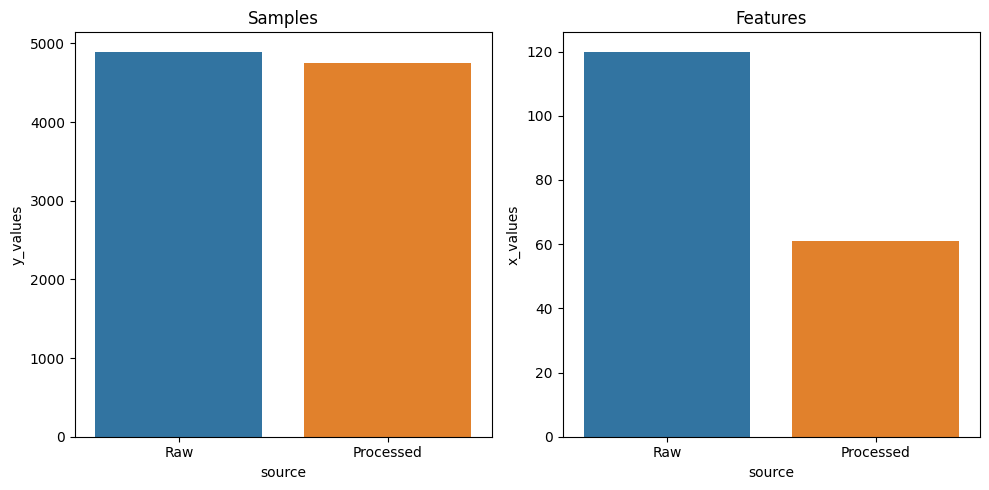

In [10]:
raw_y, raw_x = backend.shape
sources = ['Raw', 'Processed']

processed_y, processed_x = df.shape

to_plot = pd.DataFrame(
    {
        'y_values': [raw_y, processed_y],
        'x_values': [raw_x, processed_x],
        'source': sources
    }
)

print(to_plot)
sources = ['Raw', 'Processed']
to_plot.set_index(pd.Index(sources))

sns.despine(left=True,right=True) # remove axis border


fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False) # Grid

ax1 = sns.barplot(y='y_values',
                 x='source',
                 data=to_plot,
                ax=axes[0])

ax1.title.set_text('Samples')

ax2 = sns.barplot(y='x_values',
                 x='source',
                 data=to_plot,
                ax=axes[1])

ax2.title.set_text('Features')

plt.tight_layout()


## Mesures

### Raw data

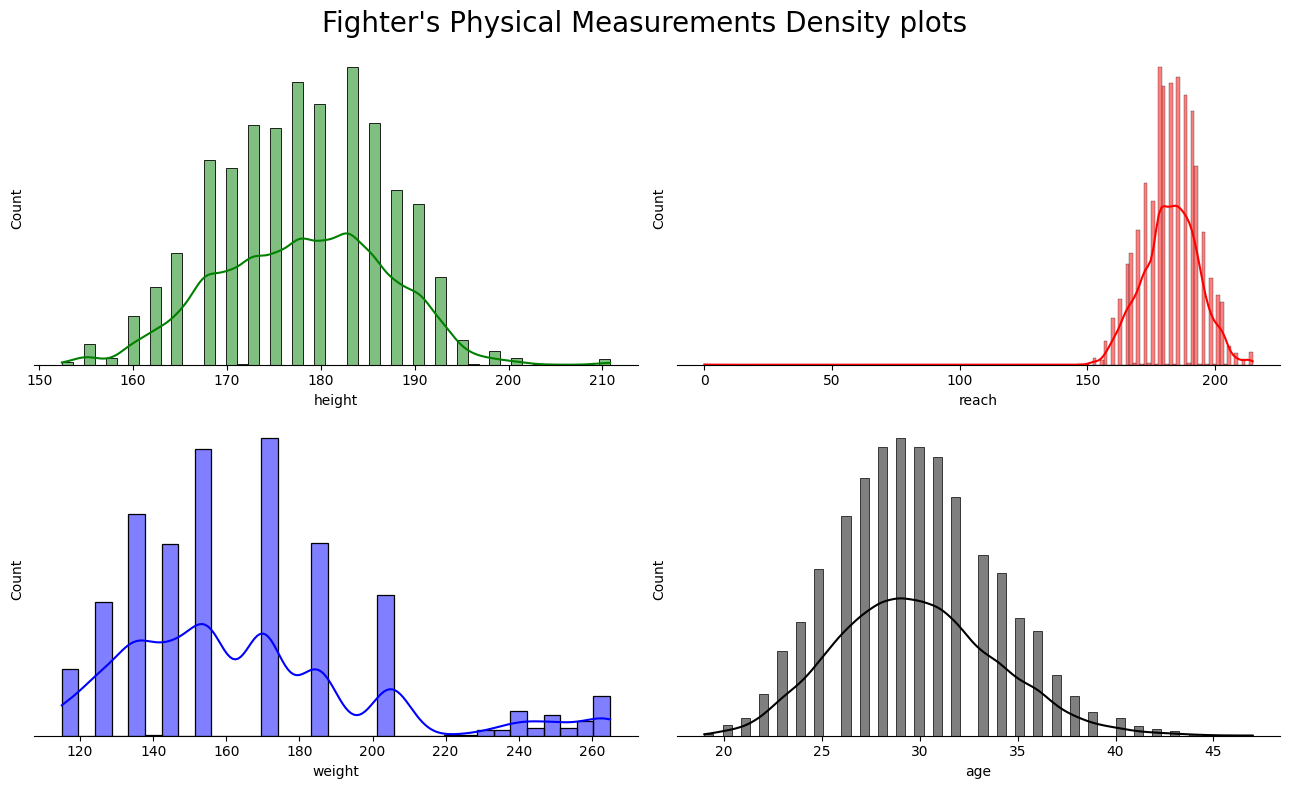

In [11]:
height = pd.concat([backend["b_height_cms"],backend["r_height_cms"]],axis=0)
reach = pd.concat([backend["b_reach_cms"],backend["r_reach_cms"]],axis=0)
weight = pd.concat([backend["b_weight_lbs"],backend["r_weight_lbs"]],axis=0)
age = pd.concat([backend["b_age"], backend["r_age"]],axis=0)

mesures = {
    'height': height,
    'reach': reach,
    'weight': weight,
    'age': age
}

fighter_measures = pd.DataFrame(mesures) \
    .reset_index(drop=True) \
    .dropna()

# subplots:
fig, axes = plt.subplots(2, 2, figsize=(13, 8), sharex=False) # Grid
fig.suptitle("Fighter's Physical Measurements Density plots",fontsize=20) # Main title
sns.despine(left=True,right=True) # remove axis border

# density plots
sns.histplot(fighter_measures["height"],color="green", kde=True, ax=axes[0, 0])
sns.histplot(fighter_measures["reach"],color="red", kde=True, ax=axes[0, 1])
sns.histplot(fighter_measures["weight"],color="blue",kde=True, ax=axes[1, 0])
sns.histplot(fighter_measures["age"],color="black", kde=True, ax=axes[1, 1])

plt.setp(axes, yticks=[]) # y-ticks range disabled
plt.tight_layout() #auto-adjusts subplots to the figure area

### Cleaned data

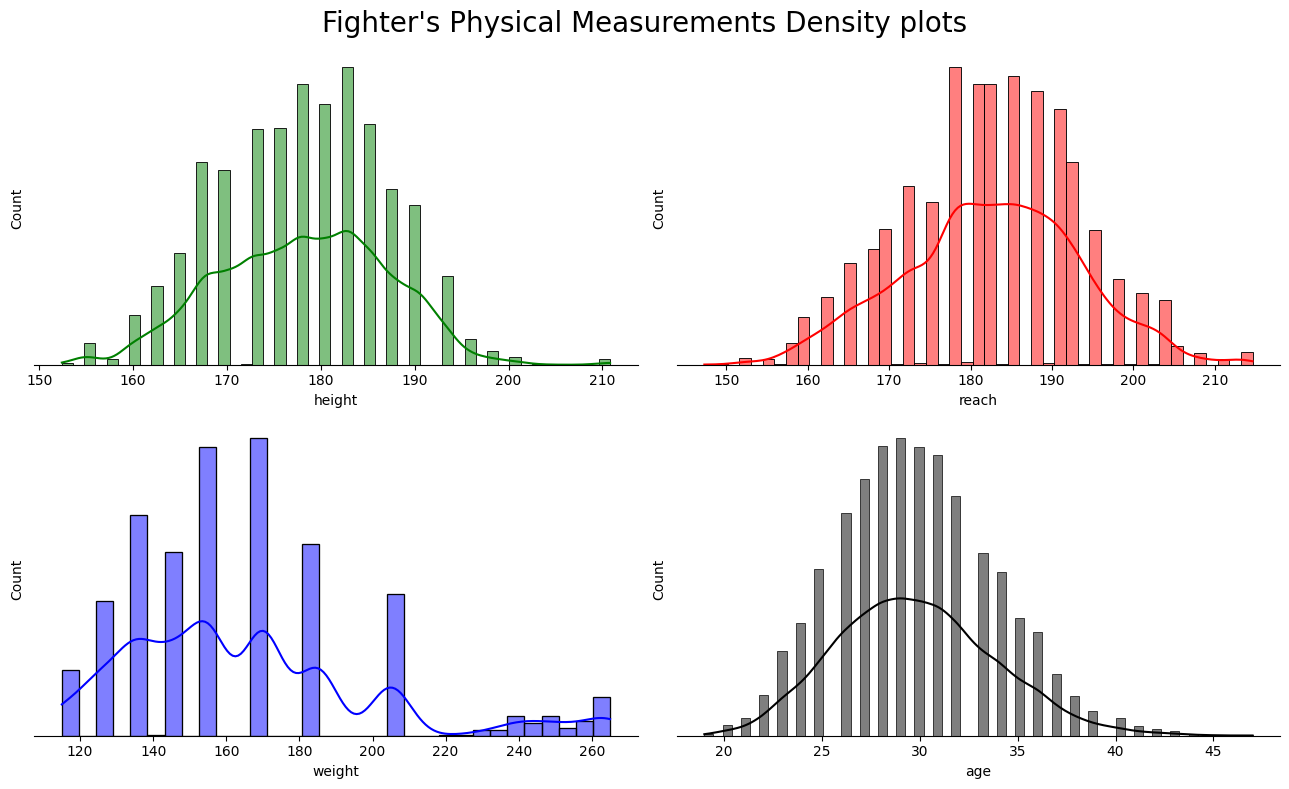

In [12]:
height = pd.concat([df["b_height_cms"],df["r_height_cms"]],axis=0)
reach = pd.concat([df["b_reach_cms"],df["r_reach_cms"]],axis=0)
weight = pd.concat([df["b_weight_lbs"],df["r_weight_lbs"]],axis=0)
age = pd.concat([df["b_age"],df["r_age"]],axis=0)

mesures = {
    'height': height,
    'reach': reach,
    'weight': weight,
    'age': age
}

fighter_measures = pd.DataFrame(mesures) \
    .reset_index(drop=True) \
    .dropna()

# subplots:
fig, axes = plt.subplots(2, 2, figsize=(13, 8), sharex=False) # Grid
fig.suptitle("Fighter's Physical Measurements Density plots",fontsize=20) # Main title
sns.despine(left=True,right=True) # remove axis border

# density plots
sns.histplot(fighter_measures["height"],color="green", kde=True, ax=axes[0, 0])
sns.histplot(fighter_measures["reach"],color="red", kde=True, ax=axes[0, 1])
sns.histplot(fighter_measures["weight"],color="blue",kde=True, ax=axes[1, 0])
sns.histplot(fighter_measures["age"],color="black", kde=True, ax=axes[1, 1])

plt.setp(axes, yticks=[]) # y-ticks range disabled
plt.tight_layout() #auto-adjusts subplots to the figure area

## Age winners vs Age lossers

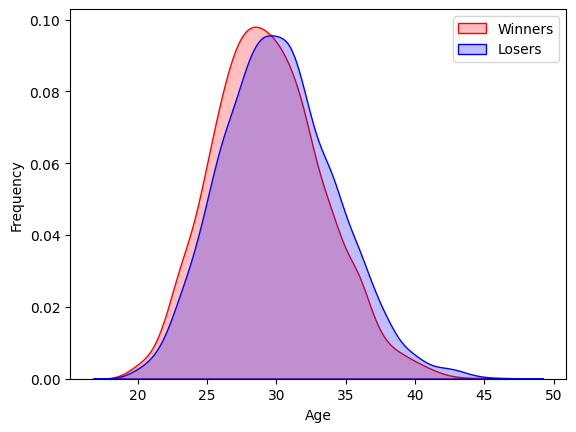

In [13]:
winners_age_combinded = pd.concat([df["b_age"][(df["winner"] == color_code['Blue'])], # age of blue winners
                                   df["r_age"][(df["winner"] == color_code['Red']) ] # age of red winners
                                  ]).reset_index(drop=True)

losers_age_combinded = pd.concat([df["b_age"][(df["winner"] == color_code['Red']) ], # when winner was 0(red), what's the age of loser (b_age)
                                   df["r_age"][(df["winner"] == color_code['Blue']) ] # same logic as above. age of red loser
                                  ]).reset_index(drop=True)

g = sns.kdeplot(winners_age_combinded, color="Red", fill = True)
g = sns.kdeplot(losers_age_combinded, color="Blue", fill = True, ax=g)

g.set_xlabel("Age")
g.set_ylabel("Frequency")
g = g.legend(["Winners","Losers"])